# Fourier Series Approximation

In [1]:
import numpy as np
import scipy.integrate as ig
import matplotlib.pyplot as plt

The goal of this notebook is to take in a continuous function $$f(x)$$ and construct a Fourier series to represent the function. As detailed in MATH 316, a continuous function can be represented as 

$$f(x) = \sum_{n=1}^{\infty} a_n\cos{\left(\frac{n \pi x}{L}\right)} + b_n\sin{\left(\frac{n \pi x}{L}\right)}$$

where $a_n, b_n$ are constants and the function is defined over some interval $[-L,L]$. As we can't iterate infinitely for some $x$, we'll define a recursion depth "r_depth".

$$f(x) = \sum_{n=1}^{\text{r_depth}} a_n\cos{\left(\frac{n \pi x}{L}\right)} + b_n\sin{\left(\frac{n \pi x}{L}\right)}$$

Let us examine a simple case of the linear function $f(x) = x$. As we know the form of the Fourier series, we can focus our efforts on getting the unknown constant coefficients of each term.

In [2]:
# function f
f = lambda x: x
max_depth = 100  #number of terms in the series expansion
int_limit = 1000 #limit for number of subdivisions used by the integration

# generalized eigenfunctions for our inner product
cos_eigenf = lambda n, x, L: np.cos(n * x * np.pi / L)
sin_eigenf = lambda n, x, L: np.sin(n * x * np.pi / L)

# function returns an array of coefficients
# - column 0 represents a_n
# - column 1 represents b_n
# L represents the domain we are interested in [-L, L]
def fourier_series_coefficients(f, L, r_depth):
    coeffs = np.zeros((r_depth, 2))
    
    for n in range(0, r_depth):
        try:
            coeffs[n][0] = ig.quad(lambda x: f(x) * cos_eigenf(n, x, L), -L, L, limit=int_limit)[0] / L
            coeffs[n][1] = ig.quad(lambda x: f(x) * sin_eigenf(n, x, L), -L, L, limit=int_limit)[0] / L
        except:
            print("Integration failed at depth: ", n)
        
    # as mentioned in class, a_0 terms need to be divided by 2
    # if they're treated as general a_n terms
    coeffs[0][0] = coeffs[0][0]*0.5
    coeffs[0][1] = coeffs[0][1]*0.5
    return coeffs

# calculates the approximated value of f(x) using an array of Fourier series coefficients
# L represents the domain we are interested in [-L, L]
def fourier_series(coeffs, x, L, r_depth):
    total = 0
    for n in range(0, r_depth):
        total += coeffs[n][0] * cos_eigenf(n, x, L)
        total += coeffs[n][1] * sin_eigenf(n, x, L)
    return total

# a simple graph representing the original f(x) and the Fourier series
# resolution is the number of points to graph
def graph(func, coeffs, L, resolution, r_depth):
    x = np.linspace(-L, L, resolution)
    y = fourier_series(coeffs, x, L, r_depth)

    plt.figure(figsize=(10,6))
    plt.plot(x, y, label="r_depth = " + str(r_depth))
    plt.plot(x, f(x), linestyle='dashed', label="original function")
    plt.legend()
    


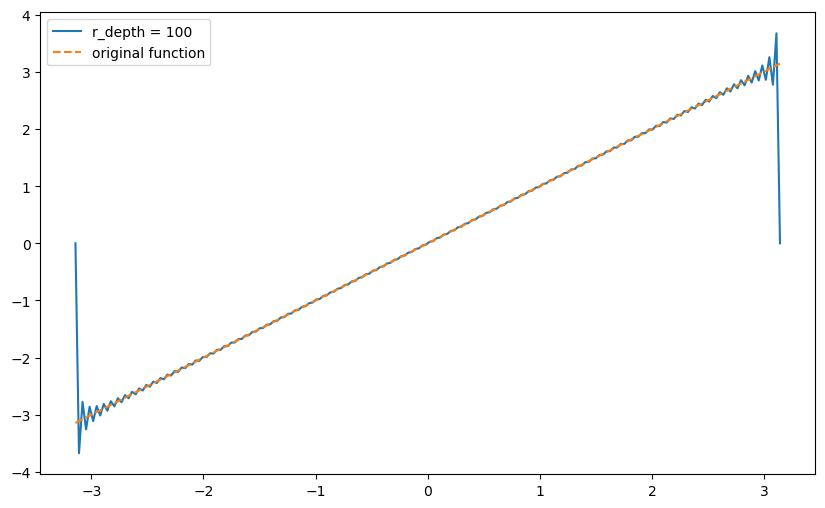

In [3]:
coefficients = fourier_series_coefficients(f, np.pi, max_depth)
graph(f, coefficients, np.pi, 200, max_depth)

## Progression of recursion depths shows the increasing accuracy

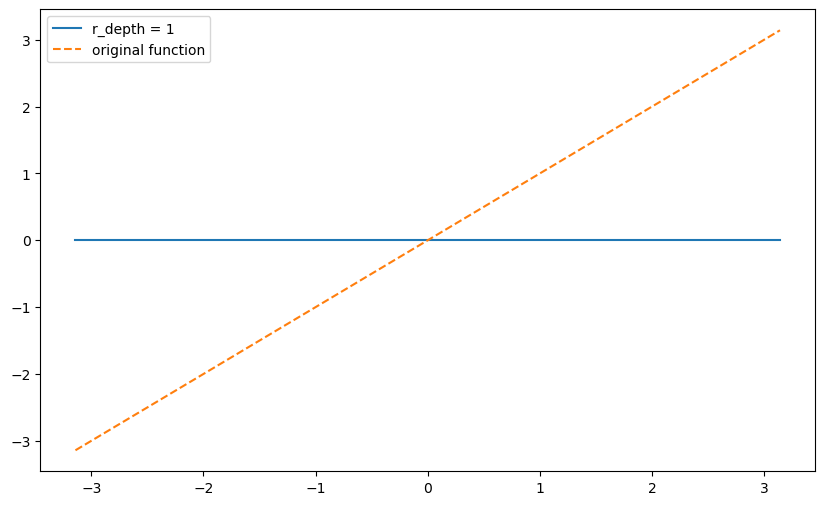

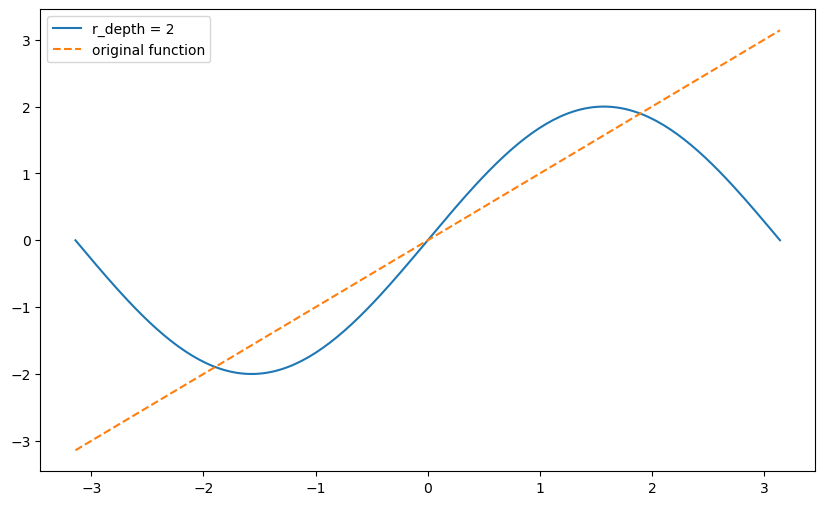

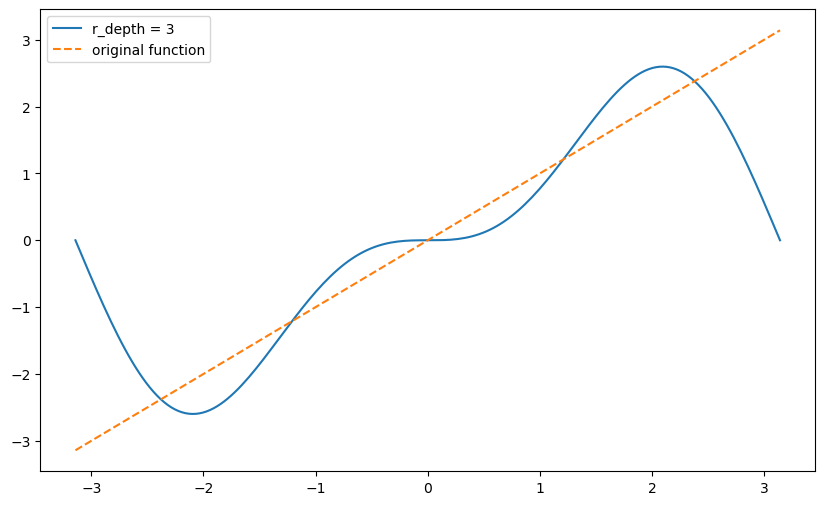

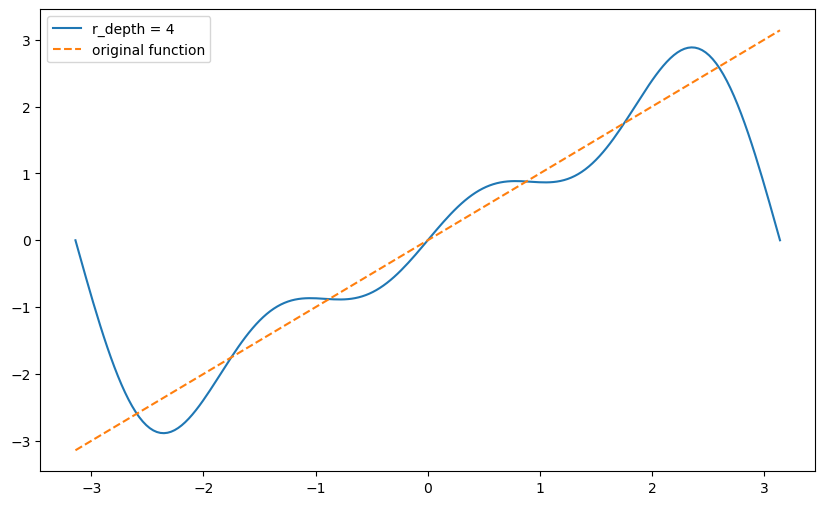

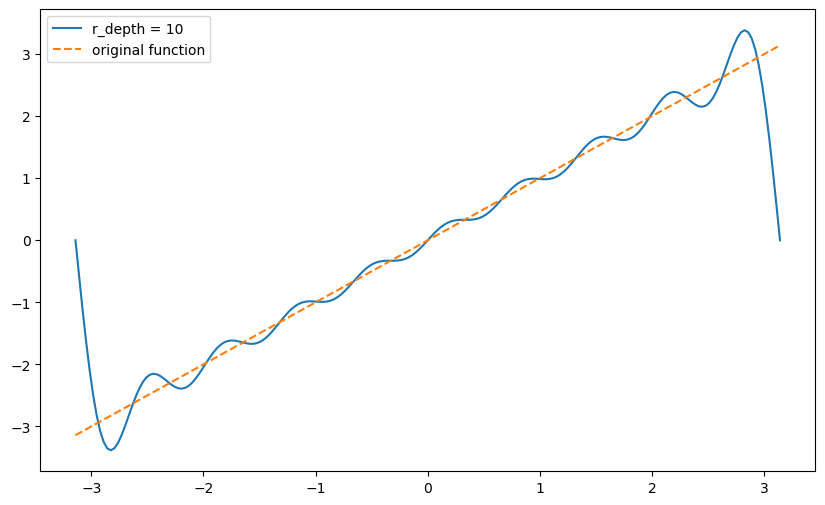

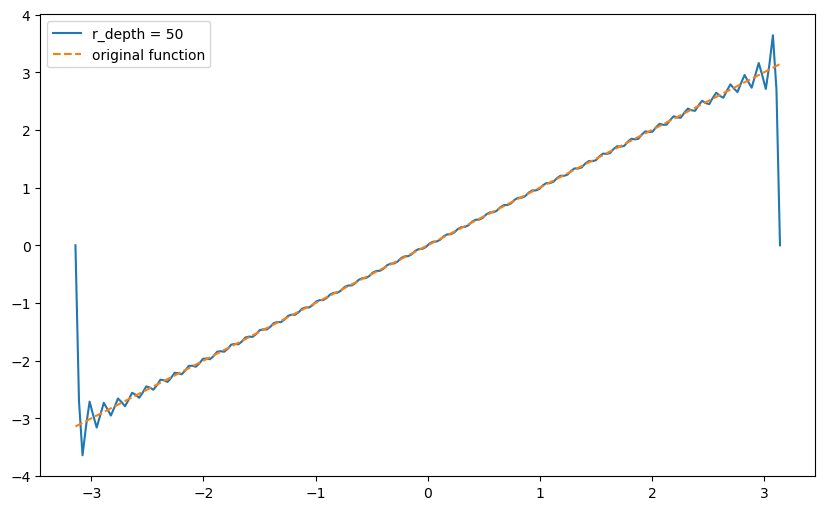

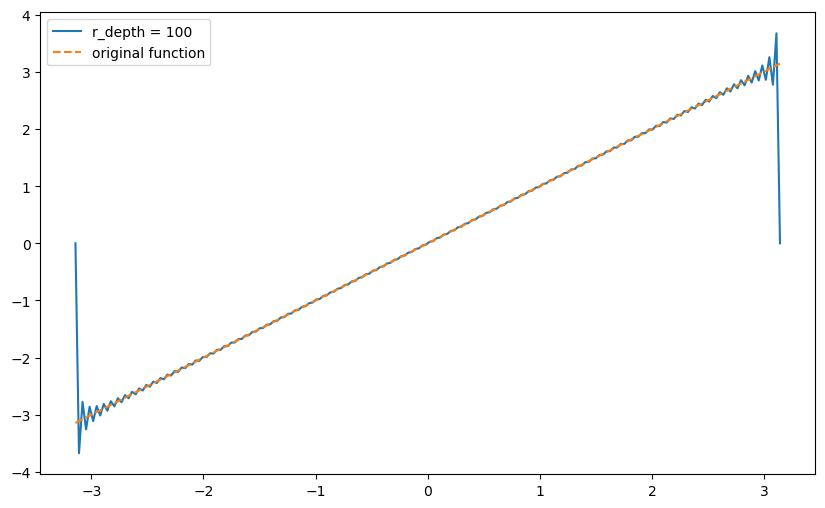

In [4]:
for depth in [1,2,3,4, 10, 50, 100]:
    graph(f, coefficients, np.pi, 200, depth)

## Issues
Note the "tails" at the beginning and end of our series solution. This arises from the assumed periodic nature of our function, which is not actually continuously periodic, $$f(L) \neq f(-L),$$ thus the values fill in the jump from the end and beginning of a period as seen by both tails terminating at 0. We can see how this would work better with a finite even function defined on the entire domain, which necessitates having the same values at both ends.

$$ f(x) = |x|$$

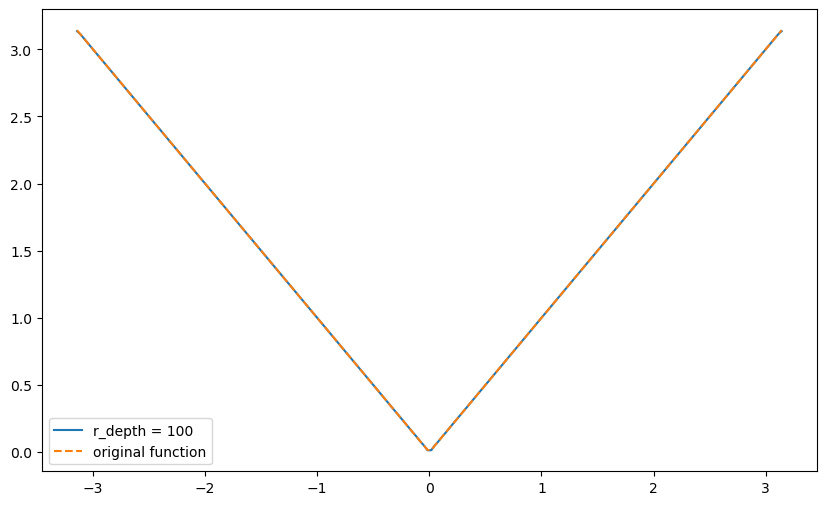

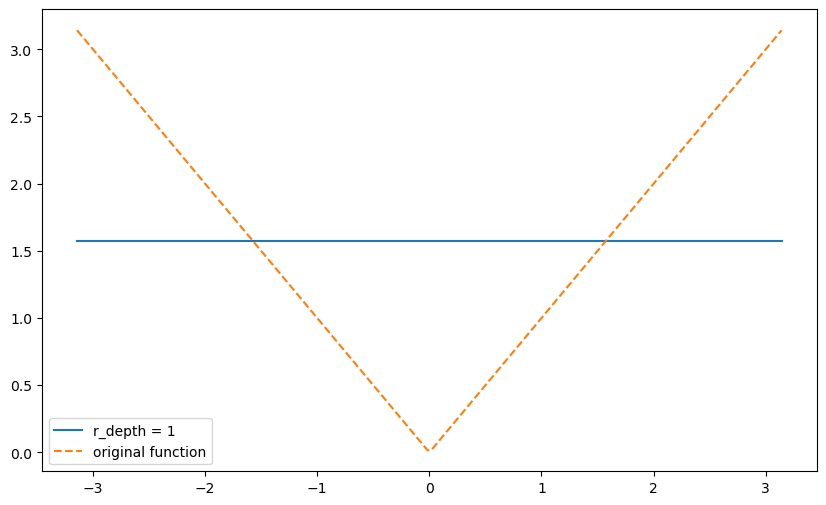

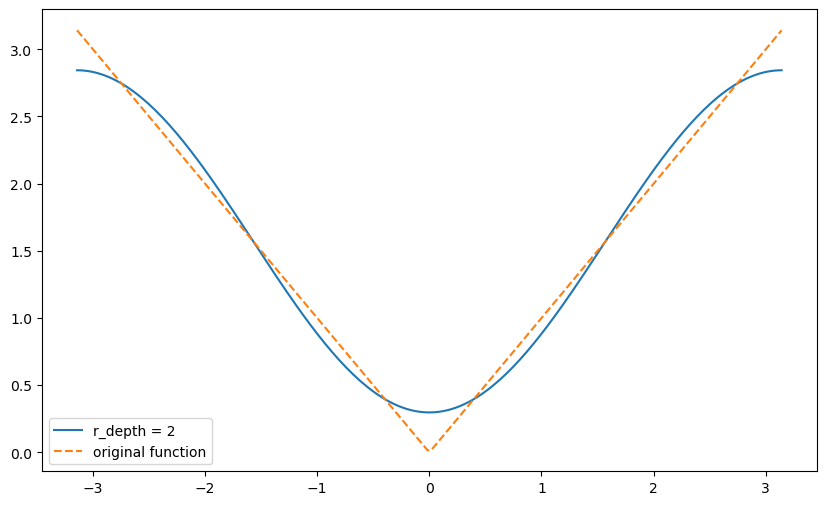

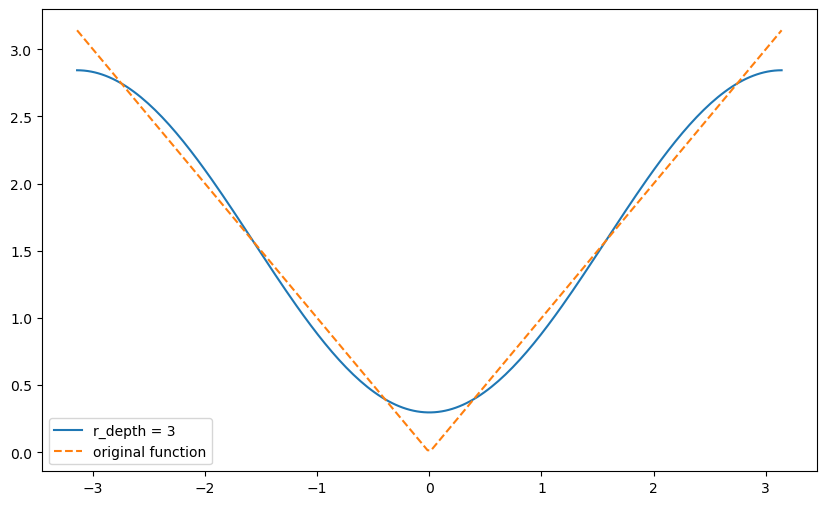

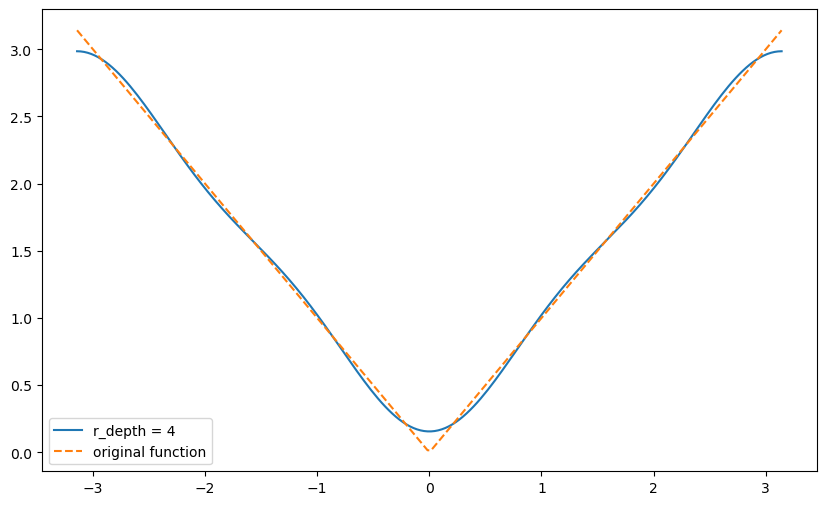

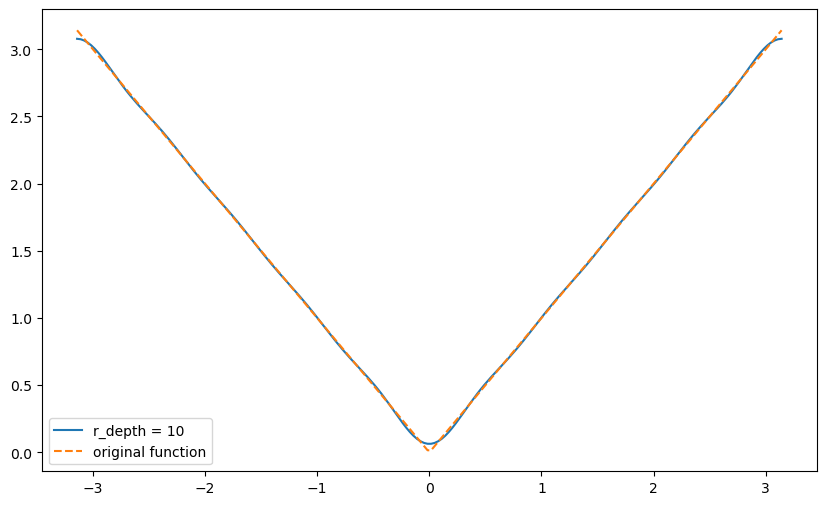

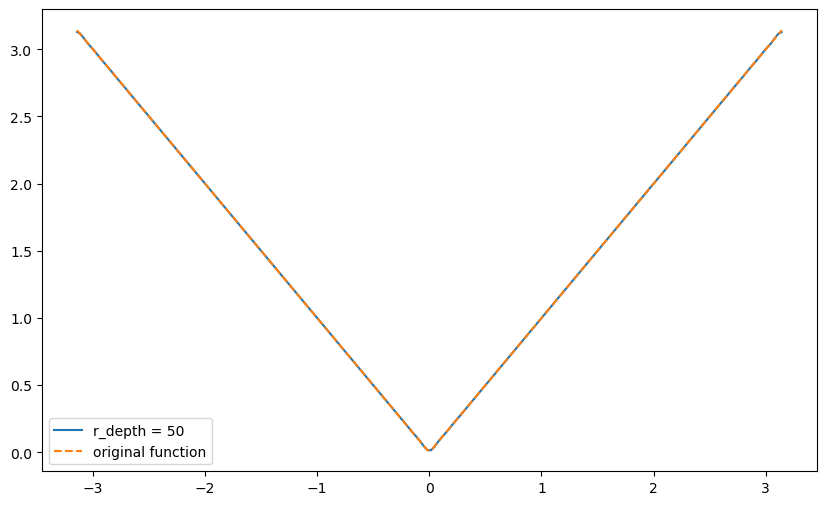

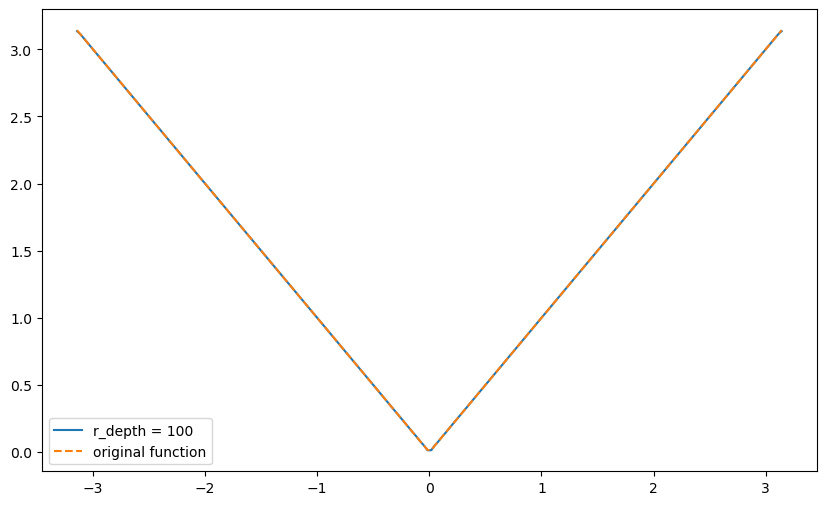

In [5]:
f = lambda x: np.where(x > 0, x, -x)
coefficients = fourier_series_coefficients(f, np.pi, max_depth)
graph(f, coefficients, np.pi, 200, max_depth)


for depth in [1,2,3,4, 10, 50, 100]:
    graph(f, coefficients, np.pi, 200, depth)


We can now see smooth terminations on both ends of the domain.


## Jump discontinuities
Notably, the Fourier series doesn't play nicely with very severe kinks or jump discontinuities. A square wave is one such example:
$$f(x) = 
 \begin{cases} 
      -1 & x \mod 2 < 1 \\
      1 & x \mod 2 \geq 1 
   \end{cases}
$$

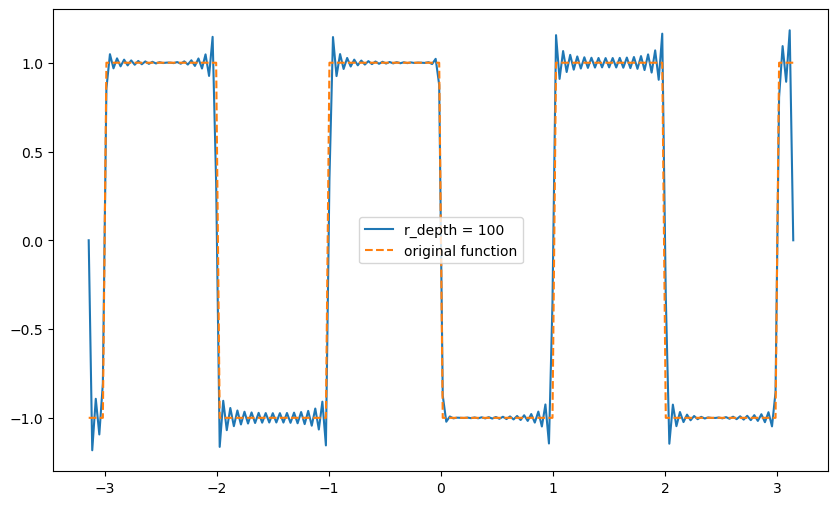

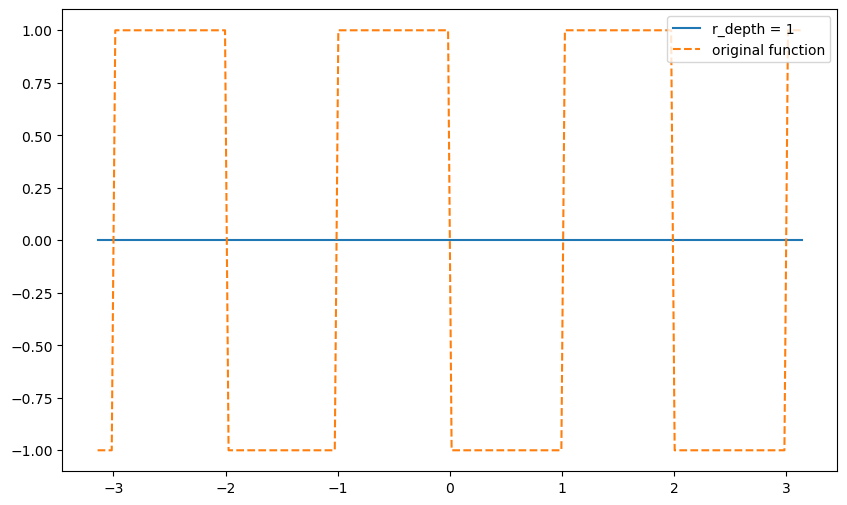

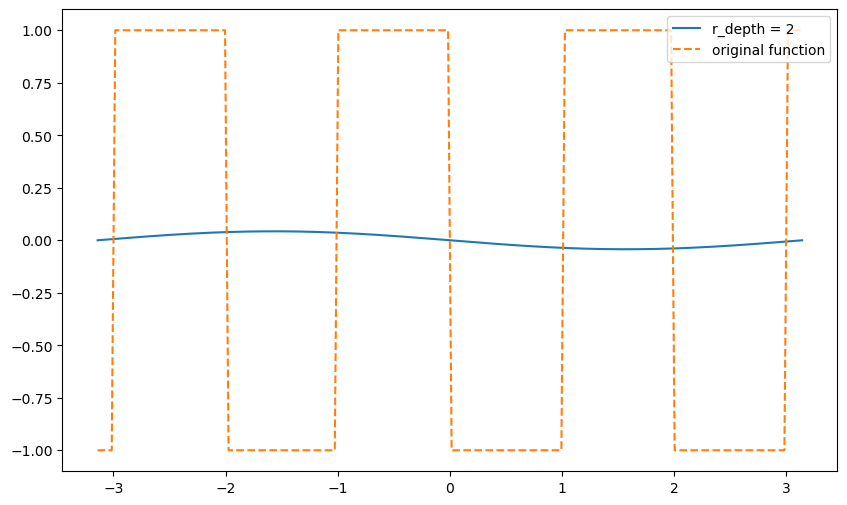

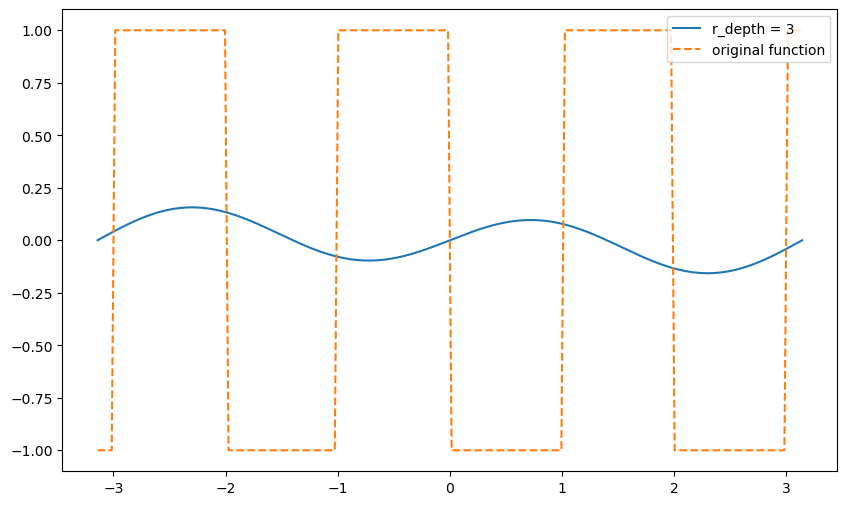

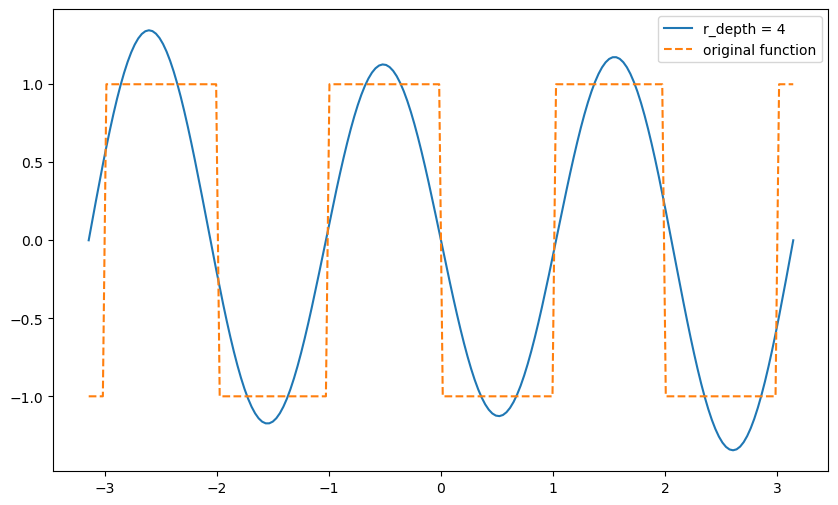

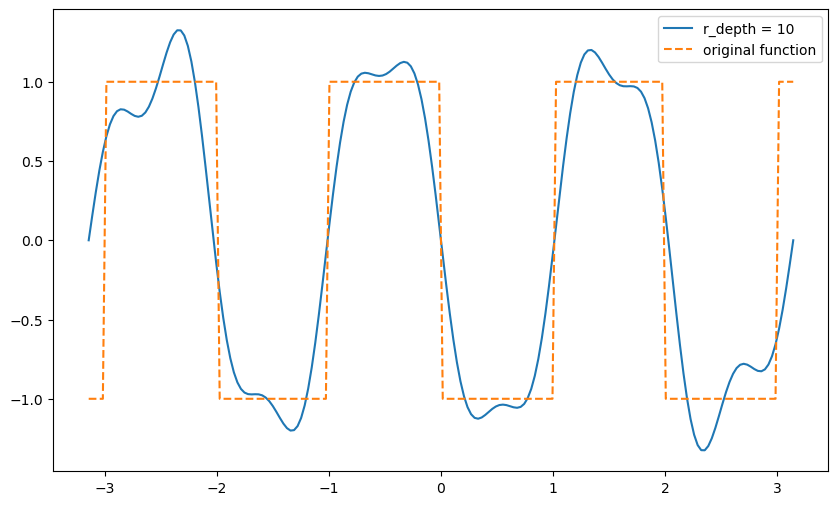

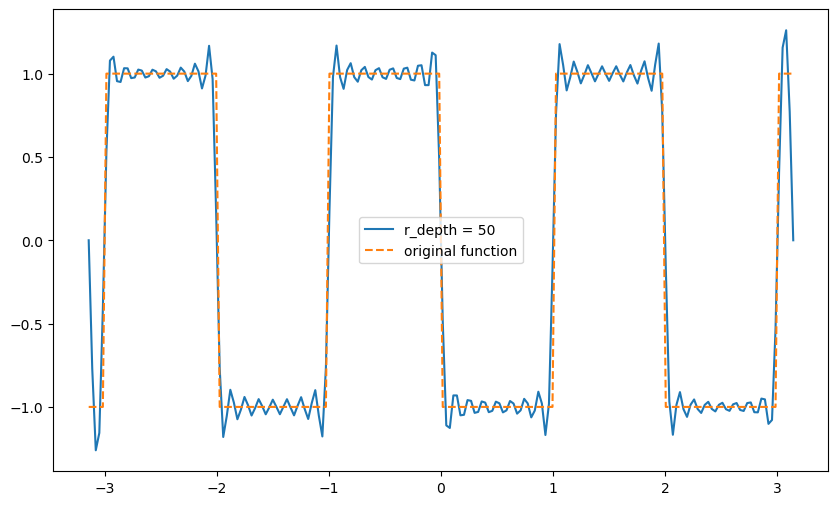

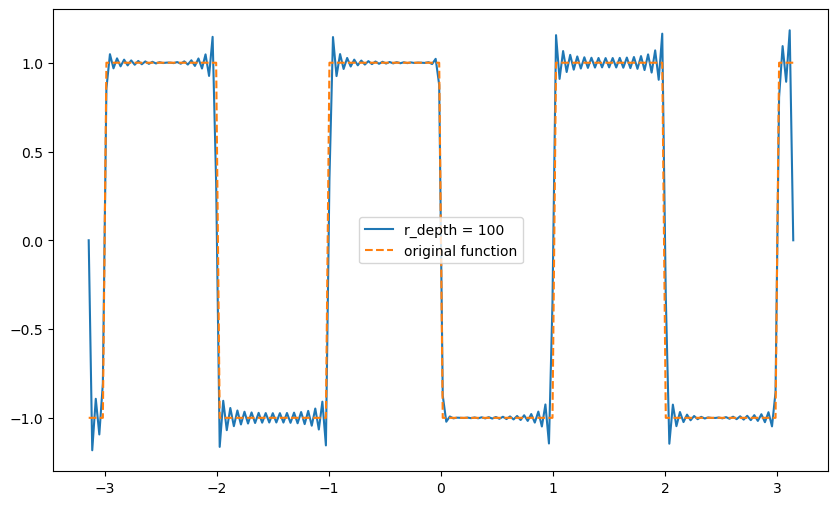

In [7]:
f = lambda x: np.where(x % 2 >= 1, 1, -1)
coefficients = fourier_series_coefficients(f, np.pi, max_depth)
graph(f, coefficients, np.pi, 200, max_depth)


for depth in [1,2,3,4, 10, 50, 100]:
    graph(f, coefficients, np.pi, 200, depth)

The Fourier series approximation poorly handles the jump discontinuities occuring at integer $x$.